In [1]:
# Import dependencies
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Import dataset and make EIN column index
charity_df = pd.read_csv("charity_data.csv", index_col = 0)
charity_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,,
10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# PREPROCESSING

In [2]:
# Get datatypes
charity_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
name_df = pd.DataFrame(charity_df['NAME'])
charity_df= charity_df.drop(["NAME"],1)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,
10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes=="object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [5]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Print out the app_type value counts
app_type_counts = charity_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

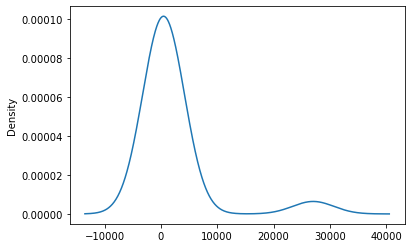

In [7]:
# Visualize the app_type value counts 
app_type_counts.plot.density()

In [8]:
# Determine which values to replace
replace_app_types = list(app_type_counts[app_type_counts<100].index)
# Replace in DataFrame
for app_type in replace_app_types:
    charity_df.APPLICATION_TYPE  = charity_df.APPLICATION_TYPE.replace(app_type,"Other")
# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Print out the affiliation value counts
affiliation_counts = charity_df.AFFILIATION.value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

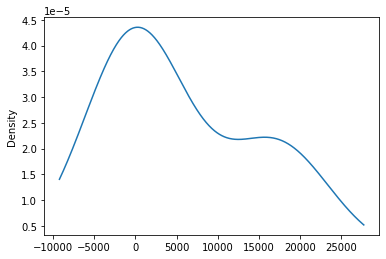

In [10]:
# Visualize the affiliation value counts 
affiliation_counts.plot.density()

In [11]:
# Print out the classificaion value counts
classification_count = charity_df.CLASSIFICATION.value_counts()
classification_count 

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1236        1
C5200        1
C1580        1
C6100        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

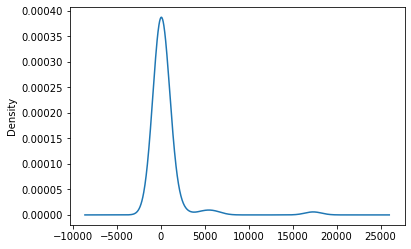

In [12]:
# Visualize the classification value counts 
classification_count .plot.density()

In [13]:
# Determine which values to replace
replace_classifications = list(classification_count[classification_count<1000].index)
# Replace in DataFrame
for classification in replace_classifications:
    charity_df.CLASSIFICATION  = charity_df.CLASSIFICATION.replace(classification,"Other")
# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Print out the use case value counts
use_case_counts = charity_df.USE_CASE.value_counts()
use_case_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [15]:
# Print out the organization type value counts
organization_counts = charity_df.ORGANIZATION.value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [16]:
# Print out the income amount value counts
income_amount_counts = charity_df.INCOME_AMT.value_counts()
income_amount_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [17]:
# Check the number of unique values in each column after bucketing
charity_df[charity_cat].nunique()

APPLICATION_TYPE          10
AFFILIATION                6
CLASSIFICATION             6
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [18]:
# Dropping SPECIAL_CONSIDERATIONS column and redefining categorical columns
charity_df = charity_df.drop(['SPECIAL_CONSIDERATIONS'],1)
charity_cat = charity_df.dtypes[charity_df.dtypes=="object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [19]:
# Create a OnHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]),index=charity_df.index)

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10547893,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10553066,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10556103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Merge the two dataframes
charity_df = charity_df.merge(encode_df, right_index = True, left_index = True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531628,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10553066,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10556103,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# PREPARE DATA FOR THE MODEL

In [21]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 78)

In [22]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# DESIGN THE MODEL

In [23]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 76
hidden_nodes_layer2 = 20


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Check the structure of the model 
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 76)                3268      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1540      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 4,829
Trainable params: 4,829
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 83us/sample - loss: 0.5736 - accuracy: 0.7184
Epoch 2/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5559 - accuracy: 0.7311
Epoch 3/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5525 - accuracy: 0.7317
Epoch 4/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5508 - accuracy: 0.7310
Epoch 5/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5502 - accuracy: 0.7322
Epoch 6/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5487 - accuracy: 0.7336
Epoch 7/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5483 - accuracy: 0.7327
Epoch 8/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5469 - accuracy: 0.7347
Epoch 9/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5472 - accuracy: 0.7343
Epoch

25724/25724 [==============================] - 1s 47us/sample - loss: 0.5373 - accuracy: 0.7401
Epoch 77/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5372 - accuracy: 0.7402
Epoch 78/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5376 - accuracy: 0.7398
Epoch 79/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5367 - accuracy: 0.7409
Epoch 80/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5370 - accuracy: 0.7408
Epoch 81/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5366 - accuracy: 0.7398
Epoch 82/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5367 - accuracy: 0.7414
Epoch 83/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5368 - accuracy: 0.7411
Epoch 84/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5370 - accuracy: 0.7405
Epoch 85/100
25724/25724 [======

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5528 - accuracy: 0.7251
Loss: 0.556690348737789, Accuracy: 0.7251312136650085


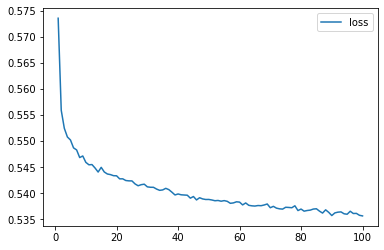

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

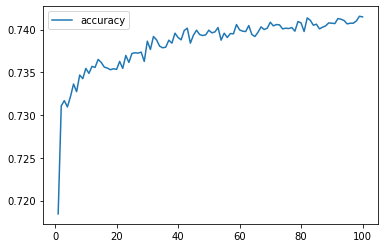

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")

# OPTIMIZE THE MODEL

CLEAN NOISY DATA

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

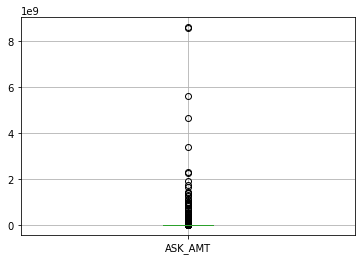

In [29]:
# Get statistical description to find outliers
charity_df.boxplot(['ASK_AMT'])
charity_df.describe()['ASK_AMT']

In [30]:
# Find outliers
iqr = 7.742000e+03 - 5.000000e+03
high_value = 7.742000e+03 + (iqr*1.5)
low_value = 5.000000e+03 - iqr*1.5
print(high_value,low_value)

11855.0 887.0


In [31]:
# Get the count of outliers
ask_amt_outliers = charity_df.apply(lambda x: True if x['ASK_AMT'] > 11855.0 else False , axis=1)
outliers_row_count = len(ask_amt_outliers[ask_amt_outliers == True].index)
outliers_row_count 

8206

In [32]:
# Drop the outlier data rows
charity_df = charity_df[charity_df['ASK_AMT'] < 11855.0] 
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10553066,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10556855,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10571689,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Get the count of inactive organizations
inactive_rows = charity_df.apply(lambda x: True if x['STATUS'] == 0 else False , axis=1)
inactive_row_count = len(inactive_rows[inactive_rows == True].index)
inactive_row_count

5

In [34]:
# Drop the inactive organizations
charity_df = charity_df[charity_df['STATUS'] == 1] 
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10553066,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10556855,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10571689,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Split our preprocessed data into our features and target arrays
new_y = charity_df["IS_SUCCESSFUL"].values
new_X = charity_df.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,random_state= 78)

In [36]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ADD HIDDEN ROWS AND NEURONS TO THE MODEL

In [37]:
# Define the model -deep neural net with more layers and more neurons
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 97
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 5

nn_optimized1 = tf.keras.models.Sequential()

# First hidden layer
nn_optimized1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn_optimized1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_optimized1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_optimized1.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Check the structure of the model 
nn_optimized1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 97)                4171      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1960      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 6,242
Trainable params: 6,242
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn_optimized1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Train the model
fit_model = nn_optimized1.fit(X_train_scaled,y_train,epochs=100)

Train on 19566 samples
Epoch 1/100
19566/19566 [==============================] - 2s 93us/sample - loss: 0.5493 - accuracy: 0.7406
Epoch 2/100
19566/19566 [==============================] - 1s 54us/sample - loss: 0.5327 - accuracy: 0.7483
Epoch 3/100
19566/19566 [==============================] - 1s 64us/sample - loss: 0.5293 - accuracy: 0.7484
Epoch 4/100
19566/19566 [==============================] - 1s 57us/sample - loss: 0.5281 - accuracy: 0.7502
Epoch 5/100
19566/19566 [==============================] - 1s 59us/sample - loss: 0.5276 - accuracy: 0.7502
Epoch 6/100
19566/19566 [==============================] - 1s 53us/sample - loss: 0.5260 - accuracy: 0.7504
Epoch 7/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5257 - accuracy: 0.7516
Epoch 8/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5250 - accuracy: 0.7507
Epoch 9/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5251 - accuracy: 0.7510
Epoch

19566/19566 [==============================] - 1s 51us/sample - loss: 0.5168 - accuracy: 0.7541
Epoch 77/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5165 - accuracy: 0.7550
Epoch 78/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5167 - accuracy: 0.7548
Epoch 79/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5164 - accuracy: 0.7551
Epoch 80/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5172 - accuracy: 0.7546
Epoch 81/100
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5168 - accuracy: 0.7545
Epoch 82/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5163 - accuracy: 0.7551
Epoch 83/100
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5169 - accuracy: 0.7547s - loss: 0.5181 - accuracy
Epoch 84/100
19566/19566 [==============================] - 1s 50us/sample - loss: 0.5163 - accuracy: 0.7556
Epoch

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6522/1 - 0s - loss: 0.4595 - accuracy: 0.7418
Loss: 0.5468100115533476, Accuracy: 0.7417969703674316


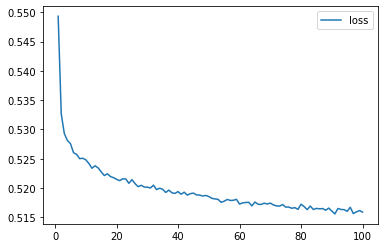

In [41]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

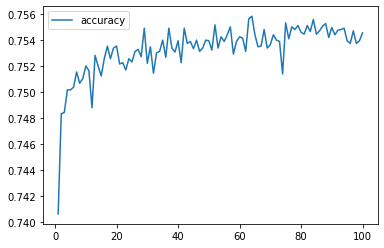

In [42]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

ADD EPOCHS FOR MODEL TRAINING 

In [43]:
# Train the model
fit_model = nn_optimized1.fit(X_train_scaled,y_train,epochs=500)

Train on 19566 samples
Epoch 1/500
19566/19566 [==============================] - 1s 54us/sample - loss: 0.5157 - accuracy: 0.7549
Epoch 2/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5157 - accuracy: 0.7540
Epoch 3/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5160 - accuracy: 0.7547
Epoch 4/500
19566/19566 [==============================] - 1s 54us/sample - loss: 0.5156 - accuracy: 0.7549
Epoch 5/500
19566/19566 [==============================] - 1s 53us/sample - loss: 0.5156 - accuracy: 0.7551
Epoch 6/500
19566/19566 [==============================] - 1s 62us/sample - loss: 0.5152 - accuracy: 0.7539
Epoch 7/500
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5153 - accuracy: 0.7549
Epoch 8/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5154 - accuracy: 0.7547
Epoch 9/500
19566/19566 [==============================] - 1s 53us/sample - loss: 0.5156 - accuracy: 0.7548
Epoch

19566/19566 [==============================] - 1s 51us/sample - loss: 0.5142 - accuracy: 0.7561
Epoch 77/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5143 - accuracy: 0.7558
Epoch 78/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5143 - accuracy: 0.7553
Epoch 79/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5142 - accuracy: 0.7549
Epoch 80/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5141 - accuracy: 0.7555
Epoch 81/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5141 - accuracy: 0.7551
Epoch 82/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5141 - accuracy: 0.7555
Epoch 83/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5139 - accuracy: 0.7556
Epoch 84/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5141 - accuracy: 0.7545
Epoch 85/500
19566/19566 [======

19566/19566 [==============================] - 1s 51us/sample - loss: 0.5129 - accuracy: 0.7565
Epoch 151/500
19566/19566 [==============================] - 1s 50us/sample - loss: 0.5129 - accuracy: 0.7563
Epoch 152/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5127 - accuracy: 0.7565
Epoch 153/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5130 - accuracy: 0.7561
Epoch 154/500
19566/19566 [==============================] - 1s 53us/sample - loss: 0.5127 - accuracy: 0.7562
Epoch 155/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5132 - accuracy: 0.7557
Epoch 156/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5128 - accuracy: 0.7558
Epoch 157/500
19566/19566 [==============================] - 1s 50us/sample - loss: 0.5130 - accuracy: 0.7562
Epoch 158/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5128 - accuracy: 0.7564
Epoch 159/500
19566/1956

19566/19566 [==============================] - 1s 51us/sample - loss: 0.5123 - accuracy: 0.7563
Epoch 225/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5127 - accuracy: 0.7555
Epoch 226/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5123 - accuracy: 0.7558
Epoch 227/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5128 - accuracy: 0.7555
Epoch 228/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5124 - accuracy: 0.7557
Epoch 229/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5126 - accuracy: 0.7562
Epoch 230/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5125 - accuracy: 0.7560
Epoch 231/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5123 - accuracy: 0.7562
Epoch 232/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5122 - accuracy: 0.7560
Epoch 233/500
19566/1956

19566/19566 [==============================] - 1s 52us/sample - loss: 0.5120 - accuracy: 0.7562
Epoch 299/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5117 - accuracy: 0.7570
Epoch 300/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5119 - accuracy: 0.7564
Epoch 301/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5116 - accuracy: 0.7571
Epoch 302/500
19566/19566 [==============================] - 1s 53us/sample - loss: 0.5117 - accuracy: 0.7567
Epoch 303/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5115 - accuracy: 0.7565
Epoch 304/500
19566/19566 [==============================] - 1s 62us/sample - loss: 0.5118 - accuracy: 0.7567
Epoch 305/500
19566/19566 [==============================] - 1s 54us/sample - loss: 0.5118 - accuracy: 0.7562
Epoch 306/500
19566/19566 [==============================] - 1s 53us/sample - loss: 0.5120 - accuracy: 0.7558
Epoch 307/500
19566/1956

19566/19566 [==============================] - 1s 51us/sample - loss: 0.5115 - accuracy: 0.7562
Epoch 373/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5113 - accuracy: 0.7565
Epoch 374/500
19566/19566 [==============================] - 1s 50us/sample - loss: 0.5116 - accuracy: 0.7567
Epoch 375/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5156 - accuracy: 0.7555
Epoch 376/500
19566/19566 [==============================] - 1s 50us/sample - loss: 0.5112 - accuracy: 0.7568
Epoch 377/500
19566/19566 [==============================] - 1s 50us/sample - loss: 0.5112 - accuracy: 0.7560
Epoch 378/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5111 - accuracy: 0.7564
Epoch 379/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5111 - accuracy: 0.7566
Epoch 380/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5115 - accuracy: 0.7564
Epoch 381/500
19566/1956

19566/19566 [==============================] - 1s 51us/sample - loss: 0.5107 - accuracy: 0.7563
Epoch 447/500
19566/19566 [==============================] - 1s 51us/sample - loss: 0.5114 - accuracy: 0.7565
Epoch 448/500
19566/19566 [==============================] - 1s 52us/sample - loss: 0.5108 - accuracy: 0.7559
Epoch 449/500
19566/19566 [==============================] - 1s 54us/sample - loss: 0.5110 - accuracy: 0.7560
Epoch 450/500
19566/19566 [==============================] - 1s 59us/sample - loss: 0.5109 - accuracy: 0.7568
Epoch 451/500
19566/19566 [==============================] - 2s 77us/sample - loss: 0.5108 - accuracy: 0.7562
Epoch 452/500
19566/19566 [==============================] - 1s 66us/sample - loss: 0.5111 - accuracy: 0.7559
Epoch 453/500
19566/19566 [==============================] - 1s 57us/sample - loss: 0.5107 - accuracy: 0.7561
Epoch 454/500
19566/19566 [==============================] - 1s 59us/sample - loss: 0.5110 - accuracy: 0.7565
Epoch 455/500
19566/1956

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6522/1 - 0s - loss: 0.4777 - accuracy: 0.7397
Loss: 0.5878020936782578, Accuracy: 0.7396504282951355


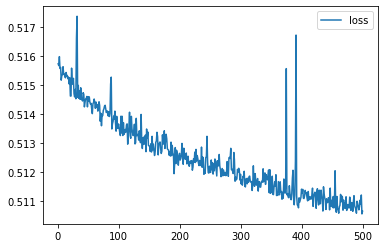

In [45]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

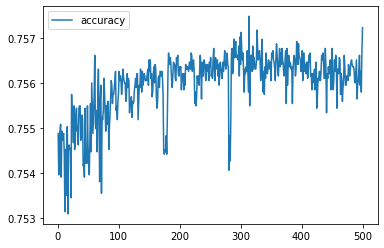

In [46]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

CHANGE OPTIMIZER

In [47]:
# Compile the model
nn_optimized1.compile(loss="binary_crossentropy", optimizer="adadelta", metrics=["accuracy"])

In [48]:
# Train the model
fit_model = nn_optimized1.fit(X_train_scaled,y_train,epochs=300)

Train on 19566 samples
Epoch 1/300
19566/19566 [==============================] - 2s 98us/sample - loss: 0.5100 - accuracy: 0.7560
Epoch 2/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5100 - accuracy: 0.7560
Epoch 3/300
19566/19566 [==============================] - 1s 57us/sample - loss: 0.5100 - accuracy: 0.7560
Epoch 4/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5100 - accuracy: 0.7560
Epoch 5/300
19566/19566 [==============================] - 1s 63us/sample - loss: 0.5099 - accuracy: 0.7560
Epoch 6/300
19566/19566 [==============================] - 1s 57us/sample - loss: 0.5099 - accuracy: 0.7560
Epoch 7/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5099 - accuracy: 0.7560
Epoch 8/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5099 - accuracy: 0.7560
Epoch 9/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5099 - accuracy: 0.7561
Epoch

19566/19566 [==============================] - 1s 55us/sample - loss: 0.5095 - accuracy: 0.7564
Epoch 77/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 78/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 79/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 80/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 81/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 82/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 83/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 84/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5094 - accuracy: 0.7564
Epoch 85/300
19566/19566 [======

19566/19566 [==============================] - 1s 56us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 151/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 152/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 153/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 154/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 155/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 156/300
19566/19566 [==============================] - 1s 57us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 157/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 158/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5093 - accuracy: 0.7564
Epoch 159/300
19566/1956

19566/19566 [==============================] - 1s 56us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 225/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 226/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 227/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 228/300
19566/19566 [==============================] - 1s 59us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 229/300
19566/19566 [==============================] - 1s 57us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 230/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 231/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 232/300
19566/19566 [==============================] - 1s 55us/sample - loss: 0.5093 - accuracy: 0.7565
Epoch 233/300
19566/1956

19566/19566 [==============================] - 1s 57us/sample - loss: 0.5092 - accuracy: 0.7565
Epoch 299/300
19566/19566 [==============================] - 1s 56us/sample - loss: 0.5092 - accuracy: 0.7565
Epoch 300/300
19566/19566 [==============================] - 1s 57us/sample - loss: 0.5092 - accuracy: 0.7565


In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6522/1 - 0s - loss: 0.4776 - accuracy: 0.7397
Loss: 0.5843359670255931, Accuracy: 0.7396504282951355


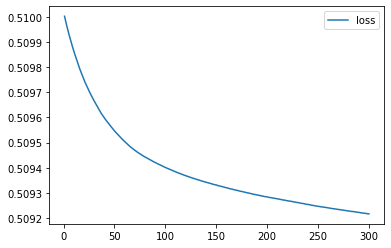

In [51]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

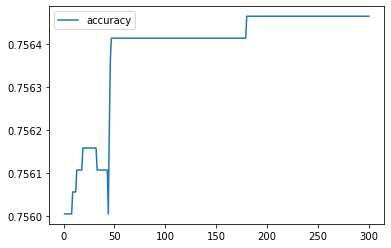

In [52]:
# Plot the loss
history_df.plot(y="accuracy")

# TEST ALTERNATIVE MODELS

In [53]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128,random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f"Random forest predictive accuracy:{accuracy_score(y_test,y_pred):.3f}")

Random forest predictive accuracy:0.742


In [54]:
from sklearn.linear_model import LogisticRegression
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs", max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.696
